In [2]:
import pandas as pd

fraud_df = pd.read_csv('data/df_fraud_real.csv')
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4182 non-null   int64 
 1   판례일련번호          4182 non-null   int64 
 2   사건명             4180 non-null   object
 3   사건번호            4182 non-null   object
 4   선고일자            4182 non-null   object
 5   법원명             4182 non-null   object
 6   사건종류명           4182 non-null   object
 7   판례상세링크          4182 non-null   object
 8   판례정보일련번호        4182 non-null   int64 
 9   선고              4182 non-null   object
 10  판결유형            4182 non-null   object
 11  판시사항            3028 non-null   object
 12  판결요지            2482 non-null   object
 13  참조조문            3001 non-null   object
 14  참조판례            1808 non-null   object
 15  판례내용            4182 non-null   object
 16  판례내용_상단         4182 non-null   object
 17  판례내용_이유         4178 non-null   object
 18  판례내용_이유(

In [3]:
fraud_df.fillna({'판례내용_이유(불용어제거)':''},inplace=True)
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4182 non-null   int64 
 1   판례일련번호          4182 non-null   int64 
 2   사건명             4180 non-null   object
 3   사건번호            4182 non-null   object
 4   선고일자            4182 non-null   object
 5   법원명             4182 non-null   object
 6   사건종류명           4182 non-null   object
 7   판례상세링크          4182 non-null   object
 8   판례정보일련번호        4182 non-null   int64 
 9   선고              4182 non-null   object
 10  판결유형            4182 non-null   object
 11  판시사항            3028 non-null   object
 12  판결요지            2482 non-null   object
 13  참조조문            3001 non-null   object
 14  참조판례            1808 non-null   object
 15  판례내용            4182 non-null   object
 16  판례내용_상단         4182 non-null   object
 17  판례내용_이유         4178 non-null   object
 18  판례내용_이유(

In [5]:
import pandas as pd
import re  # 정규 표현식 모듈
from konlpy.tag import Okt

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 불용어 파일 로드
stopwords_file_path = 'data/sorted_words_20241022.txt'
stopwords_pick = ['제', '호로', '등', '것', '항', '의', '금', '검사', '판결', '거나', '유1',
                  '상고이유', '기초', '사실', '기초사실', '사고', '피고', '원고', '피고인', 
                  '사건', '담당', '변호사', '변호인', '변론', '종결', '소외','하기로', 
                  '이를', '의하여', '받은', '있는','이고', '있고', '없는', '없으므로', 
                  '살펴보면', '있어', '지는', '있다고', '에는', '라고', '인한',
                  '의하면', '하게', '하였고', '아니한', '정당하고', '에도', '으로부터', '이라고',
                  '하여','】【', '않으므로','이라','한다','하여','없었음에도','있는것인데','되였음',
                  '하였으나','하였다고','하였다는','받아','되지','없다고','판시와']
pattern = r'제\d+|\d+호증|\d+호|\d+달러|\d+원|\d+만원|\d+만|\d+억|\d+억원'  # 정규 표현식 패턴

# 불용어 파일을 읽어 불용어 목록 생성
with open(stopwords_file_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# remove_stopwords 함수 수정
def remove_stopwords(phrase):
    if not isinstance(phrase, str):  # 입력이 문자열이 아닌 경우 빈 문자열 반환
        return ''
    # 형태소 분석을 통해 단어 리스트 생성
    tokens = okt.morphs(phrase)  # 형태소 단위로 분리
    filtered_words = [
        word for word in tokens 
        if len(word) > 1 
        and word not in stopwords 
        and not word.isdigit()  # 숫자인 경우 제외
        and word not in stopwords_pick 
        and not re.match(pattern, word)  # 패턴에 매칭되면 제외
    ]
    return ' '.join(filtered_words)  # 문자열로 반환

def remove_digits_and_letters(text):
    # 000, ooo, OOO 반복 제거 및 알파벳과 숫자 조합 제거
    text = re.sub(r'(000|ooo|OOO)+', '', text)  # 반복되는 패턴 제거
    text = re.sub(r'\d+[가-힣]+', '', text)  # 숫자와 알파벳 조합 제거
    return text

# 불용어 제거 수행 (판례내용 열의 내용을 처리)
fraud_df['판례내용_이유(불용어제거)'] = fraud_df['판례내용_이유'].apply(remove_stopwords).apply(remove_digits_and_letters)

# 결과 확인
print(fraud_df['판례내용_이유(불용어제거)'])

0       판시 일람표 서부 발부 압수 수색 검증 영장 영장 기하 압수 저장매체 탐색 출력 복...
1       화물 트럭 구입 구입 돌려줄 의사 수익 좋은 유망 물류 사업 화물 트럭 가량 구매 ...
2       오인 오해 보험 보험금 지급 제한 상해 원인 보드 다가 넘어져 다침 단순히 넘어져서...
3       북부 카합 임시 총회 개최 금지 가처분 카확 카합 임시 총회 금지 가처분 카확 소송...
4       마약 관리 향정 마약 매매 정보 널리 알리거나 제시 서는 된다 중순 대전 서구 주소...
                              ...                        
4177    개론 오면 생모 순덕 중매 의논 망부 김준 밀양 금융조합 채무 변제 본건 가옥 경매...
4178    본건 매매 계약 존속 전제 본건 매매 계약 해제 항변 본건 매매 계약 이행 쌍무계약...
4179    김홍수 고취 간첩 예비 언도 형법  판시 간첩 예비 형법   의율 여야 재론 음으로...
4180    검찰청 대리 장천 수의 고취 동업 박업 자로 6.25 사변 발발한 괴뢰군 당지 불법...
4181    다툼 증언 실부 명의 서기 1947.3 목록 토지 대금 4,200, 매수 계약금 5...
Name: 판례내용_이유(불용어제거), Length: 4182, dtype: object


In [6]:
fraud_df.to_csv('data/df_fraud_real.csv')

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# 1. TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95)

# 2. 데이터프레임을 1000개씩 나눠서 처리할 준비
chunk_size = 1000
tfidf_result = []  # 청크 처리 결과를 저장할 리스트

print("처리 시작...")

# 3. 데이터를 청크로 나누어 처리
for i in range(0, len(fraud_df), chunk_size):
    # 현재 청크 데이터 추출
    doc_chunk = fraud_df['판례내용_이유(불용어제거)'][i:i+chunk_size]
    
    # TF-IDF 적용
    tfidf_array = vectorizer.fit_transform(doc_chunk)
    
    # 청크 결과를 데이터프레임으로 변환하여 리스트에 저장
    tfidf_result.append(pd.DataFrame(tfidf_array.toarray(), columns=vectorizer.get_feature_names_out()))
    
    # 청크 처리 완료 메시지 출력
    print(f"{i+chunk_size}개 문서 처리 완료")

# 5. 모든 청크를 하나의 데이터프레임으로 합침
tfidf_df = pd.concat(tfidf_result, ignore_index=True)

# 6. 최종 결과 확인 (상위 5개 출력)
print("최종 결과:")
print(tfidf_df.head())

# 7. 데이터프레임의 크기 및 처리 완료 메시지
print(f"TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_df.shape}")

처리 시작...
1000개 문서 처리 완료
2000개 문서 처리 완료
3000개 문서 처리 완료
4000개 문서 처리 완료
5000개 문서 처리 완료
최종 결과:
         00  001  002  003  004  005  006  007  008  009  ...  행정벌  허다  허를  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN NaN NaN   
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN NaN NaN   
2  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN NaN NaN   
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN NaN NaN   
4  0.018828  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN NaN NaN   

   허무한  헐하다는  현명하신  홍완희  황무지  황씨  후단의  
0  NaN   NaN   NaN  NaN  NaN NaN  NaN  
1  NaN   NaN   NaN  NaN  NaN NaN  NaN  
2  NaN   NaN   NaN  NaN  NaN NaN  NaN  
3  NaN   NaN   NaN  NaN  NaN NaN  NaN  
4  NaN   NaN   NaN  NaN  NaN NaN  NaN  

[5 rows x 32132 columns]
TF-IDF 처리 완료. 최종 데이터프레임 크기: (4182, 32132)


In [77]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# TF-IDF 벡터라이저 설정
vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95)

# TF-IDF 벡터화 수행
tfidf_array = vectorizer.fit_transform(fraud_df['판례내용_이유(불용어제거)'])

# K-Means 클러스터링 설정 및 수행
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(tfidf_array)

# 클러스터 레이블을 데이터프레임에 추가
fraud_df['클러스터'] = kmeans.labels_

# 결과 확인
print("클러스터링 결과:")
print(fraud_df[['판례내용_이유(불용어제거)', '클러스터']].head())

클러스터링 결과:
                                      판례내용_이유(불용어제거)  클러스터
0  판시 일람표 서부 발부 압수 수색 검증 영장 영장 기하 압수 저장매체 탐색 출력 복...     6
1  화물 트럭 구입 구입 돌려줄 의사 수익 좋은 유망 물류 사업 화물 트럭 가량 구매 ...     6
2  오인 오해 보험 보험금 지급 제한 상해 원인 보드 다가 넘어져 다침 단순히 넘어져서...     3
3  북부 카합 임시 총회 개최 금지 가처분 카확 카합 임시 총회 금지 가처분 카확 소송...     6
4  마약 관리 향정 마약 매매 정보 널리 알리거나 제시 서는 된다 중순 대전 서구 주소...     6


In [78]:
# 6. 클러스터 중심 계산
cluster_centers = kmeans.cluster_centers_

# 7. 각 클러스터의 중심 단어 추출
def get_top_keywords_for_clusters(cluster_centers, vectorizer, n_words=10):
    order_centroids = cluster_centers.argsort()[:, ::-1]  # 각 클러스터의 중심 단어 인덱스 정렬
    terms = vectorizer.get_feature_names_out()  # 단어 목록
    
    cluster_keywords = {}
    for i in range(num_clusters):
        cluster_keywords[i] = [terms[ind] for ind in order_centroids[i, :n_words]]  # 상위 n_words 단어
    
    return cluster_keywords

# 8. 클러스터 중심 단어 출력
cluster_keywords = get_top_keywords_for_clusters(cluster_centers, vectorizer)
for cluster_num, keywords in cluster_keywords.items():
    print(f"\n클러스터 {cluster_num + 1}의 중심 단어들: {', '.join(keywords)}")


클러스터 1의 중심 단어들: 등기, 토지, 부동산, 매매, 계약, 소유권, 분양, 이전, 근저당권, 임야

클러스터 2의 중심 단어들: 회사, 주식, 주식회사, 자금, 대출, 거래, 투자, 사업, 계좌, 증권

클러스터 3의 중심 단어들: 포탈, 신고, 세액, 부과, 소득, 세금, 계산서, 부가가치세, 조세, 과세

클러스터 4의 중심 단어들: 보험, 계약, 보험금, 회사, 손해, 보험사, 지급, 가입, 보증, 보험료

클러스터 5의 중심 단어들: 위조, 행사, 사문서, 공문서, 문서, 형법, 판시, 명의, 변조, 사죄

클러스터 6의 중심 단어들: 형법, 형사소송법, 징역, 판시, 사기죄, 상습, 사기, 송달, 감호, 경합

클러스터 7의 중심 단어들: 지급, 계약, 사기죄, 채권, 신청, 회사, 공사, 의사, 오해, 거래

클러스터 8의 중심 단어들: 수표, 어음, 발행, 약속어음, 지급, 할인, 액면, 당좌, 부정수표단속법, 교부


In [79]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 클러스터별 상위 단어 및 그 단어들의 TF-IDF 값 확인
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
print("클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(8):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :5]:  # 상위 10개의 단어
        print(f"단어: {terms[ind]} - TF-IDF 값: {kmeans.cluster_centers_[i, ind]}")

클러스터별 상위 단어 및 TF-IDF 값:

클러스터 1:
단어: 등기 - TF-IDF 값: 0.10699935532070348
단어: 토지 - TF-IDF 값: 0.10325501807674654
단어: 부동산 - TF-IDF 값: 0.09512833251312781
단어: 매매 - TF-IDF 값: 0.0922312355443884
단어: 계약 - TF-IDF 값: 0.0807439617393945

클러스터 2:
단어: 회사 - TF-IDF 값: 0.22129975806636404
단어: 주식 - TF-IDF 값: 0.11942413808300056
단어: 주식회사 - TF-IDF 값: 0.10932096230662505
단어: 자금 - TF-IDF 값: 0.06433237944171506
단어: 대출 - TF-IDF 값: 0.05132512911725129

클러스터 3:
단어: 포탈 - TF-IDF 값: 0.14801233486766038
단어: 신고 - TF-IDF 값: 0.10563189279768205
단어: 세액 - TF-IDF 값: 0.10121932103554465
단어: 부과 - TF-IDF 값: 0.09626485054277646
단어: 소득 - TF-IDF 값: 0.08708942732016604

클러스터 4:
단어: 보험 - TF-IDF 값: 0.5771982095916829
단어: 계약 - TF-IDF 값: 0.15739632185381913
단어: 보험금 - TF-IDF 값: 0.1464096854514462
단어: 회사 - TF-IDF 값: 0.06211466547619222
단어: 손해 - TF-IDF 값: 0.05782675753316688

클러스터 5:
단어: 위조 - TF-IDF 값: 0.21186820916617483
단어: 행사 - TF-IDF 값: 0.09109047032298802
단어: 사문서 - TF-IDF 값: 0.09054864346822582
단어: 공문서 - TF-IDF 값: 0.07353803453

## 결과 분석  
클러스터 1: 등기, 토지, 부동산, 매매, 계약  
주제: 부동산과 관련된 법적 절차 (매매, 등기)  
해석: 첫 번째 결과와 비슷하게 부동산 관련된 주제를 잘 포착하고 있습니다.  

클러스터 2: 회사, 주식, 주식회사, 자금, 대출  
주제: 회사와 자금, 주식과 관련된 금융 이슈  
해석: 회사와 주식, 자금이 언급되어 있으며, 대출까지 포함하여 금융 관련 주제가 잘 포착되었습니다.  

클러스터 3: 포탈, 신고, 세액, 부과, 소득  
주제: 세금 신고와 소득 관련 이슈  
해석: 첫 번째 결과와 유사하게 세금 및 세액 신고 관련 이슈가 잘 드러났습니다.  

클러스터 4: 보험, 계약, 보험금, 회사, 손해  
주제: 보험 계약 및 보험금 청구  
해석: 보험과 보험금 관련 이슈가 두드러져 보험 주제로 구분되었습니다.  

클러스터 5: 위조, 행사, 사문서, 공문서, 문서  
주제: 문서 위조와 관련된 사건  
해석: 위조와 행사, 공문서 및 사문서 등 위조 관련 범죄가 잘 드러납니다.  

클러스터 6: 형법, 형사소송법, 징역, 판시, 사기죄  
주제: 형법 및 형사소송법과 관련된 법적 절차  
해석: 첫 번째 결과보다 형법 관련 내용이 더 명확하게 구분되었으며, 형사 관련 주제가 잘 드러났습니다.  

클러스터 7: 지급, 계약, 사기죄, 채권, 신청  
주제: 계약 및 사기죄와 관련된 법적 이슈  
해석: 지급, 채권 등이 포함되어 있어 채권 및 사기죄와 관련된 주제로 볼 수 있습니다.  

클러스터 8: 수표, 어음, 발행, 약속어음, 지급  
주제: 수표와 어음 발행  
해석: 수표, 어음, 약속어음 등이 주요 단어로 포함되어 수표와 어음 발행 및 관련 절차가 구분되었습니다.  

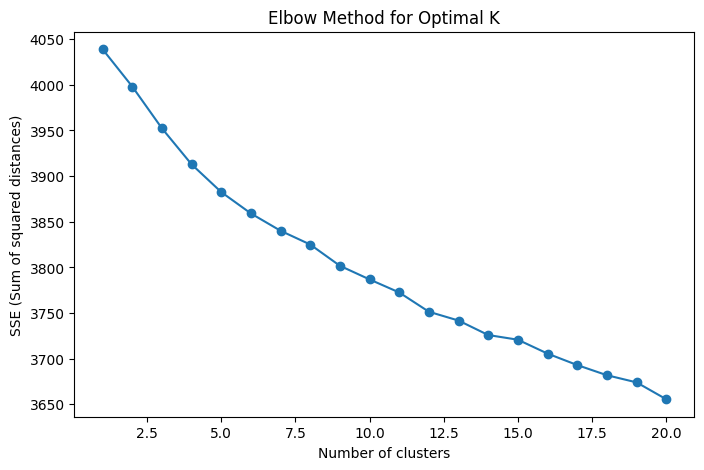

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cluster_range = range(1,21)
sse = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_array)
    sse.append(kmeans.inertia_)
    
# 엘보우 그래프
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared distances)')
plt.show()

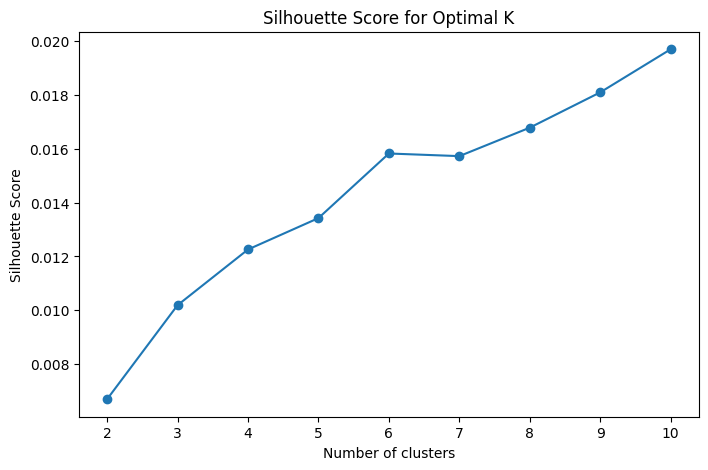

In [66]:
from sklearn.metrics import silhouette_score

# 클러스터 개수 범위 설정 (2부터 10까지)
silhouette_scores = []

# 각 클러스터 개수에 대해 K-Means 모델 학습 및 실루엣 점수 계산
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init 값을 명시적으로 10으로 설정
    clusters = kmeans.fit_predict(tfidf_array)
    silhouette_avg = silhouette_score(tfidf_array, clusters)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [91]:
top_n = 10  # 클러스터당 상위 키워드 개수
clusters_top_keywords = {}

for cluster_num in range(num_clusters):
    cluster_docs = tfidf_df[fraud_df['클러스터'] == cluster_num]  # 해당 클러스터의 문서들
    top_keywords = cluster_docs.sum().sort_values(ascending=False).head(top_n).index
    clusters_top_keywords[cluster_num] = top_keywords

# 각 클러스터에서 추출된 상위 키워드를 확인
for cluster, keywords in clusters_top_keywords.items():
    print(f"클러스터 {cluster}의 상위 키워드: {keywords}")

클러스터 0의 상위 키워드: Index(['등기', '토지', '부동산', '매매', '계약', '소유권', '분양', '이전', '근저당권', '대금'], dtype='object')
클러스터 1의 상위 키워드: Index(['회사', '주식', '주식회사', '자금', '대출', '거래', '투자', '사업', '증권', '계좌'], dtype='object')
클러스터 2의 상위 키워드: Index(['포탈', '신고', '세액', '부과', '소득', '계산서', '세금', '부가가치세', '조세', '과세'], dtype='object')
클러스터 3의 상위 키워드: Index(['보험', '계약', '보험금', '회사', '손해', '보험사', '지급', '가입', '보증', '보험료'], dtype='object')
클러스터 4의 상위 키워드: Index(['위조', '행사', '사문서', '문서', '공문서', '형법', '판시', '변조', '명의', '사죄'], dtype='object')
클러스터 5의 상위 키워드: Index(['형법', '징역', '형사소송법', '판시', '사기', '송달', '사기죄', '상습', '감호', '경합'], dtype='object')
클러스터 6의 상위 키워드: Index(['지급', '계약', '채권', '신청', '회사', '공사', '사기죄', '거래', '의사', '대금'], dtype='object')
클러스터 7의 상위 키워드: Index(['수표', '어음', '발행', '약속어음', '지급', '할인', '액면', '당좌', '부정수표단속법', '교부'], dtype='object')


In [92]:
# 한글 깨짐 방지
plt.rcParams['font.family'] = "AppleGothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

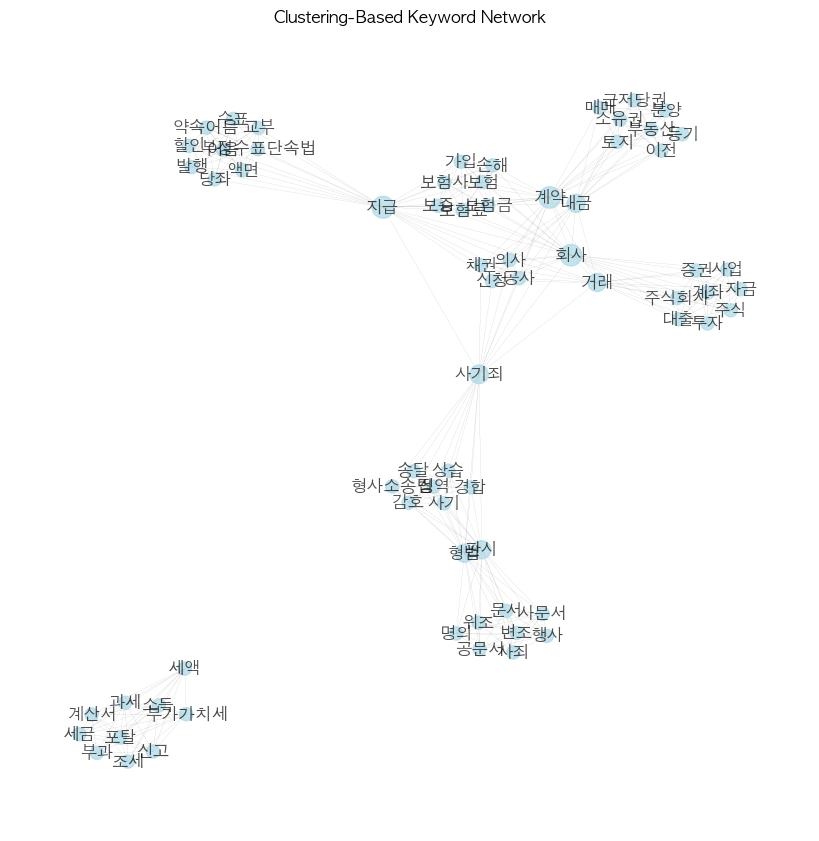

In [93]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import font_manager, rc
import platform

# 네트워크 그래프 생성
G = nx.Graph()

# 클러스터별 키워드를 노드로 추가하고, 키워드 간 엣지 설정
for cluster, keywords in clusters_top_keywords.items():
    for keyword in keywords:
        G.add_node(keyword, cluster=cluster)  # 노드 추가
    for i in range(len(keywords)):
        for j in range(i + 1, len(keywords)):
            G.add_edge(keywords[i], keywords[j])  # 엣지 추가

# 노드 라벨 설정
for node in G.nodes():
    G.nodes[node]['label'] = node  # 노드 이름을 라벨로 설정

# 레이아웃 설정 (스프링 레이아웃)
pos = nx.spring_layout(G, k=0.3)  # k 값 조절하여 노드 간 간격 조절

# 노드 크기 설정 (degree를 기반으로)
node_sizes = [d for n, d in G.degree()]

# 시각화
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, font_family=plt.rcParams['font.family'],  # 윈도우즈에서는 한글 폰트 사용
        node_size=[d * 10 for d in node_sizes],  # 노드 크기 조절
        node_color='lightblue',
        alpha=0.7,  # 노드 투명도
        width=0.1,  # 선 두께
        edge_color='gray')
plt.title('Clustering-Based Keyword Network')
plt.show()